In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df = pd.read_csv("../../datasets/ml-100k/u.data.csv", sep="\t", header=None)
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [23]:
df.columns = ["UserId","MovieId","Rating","Time(second)"]
df.head()

,UserId,MovieId,Rating,Time(second)
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


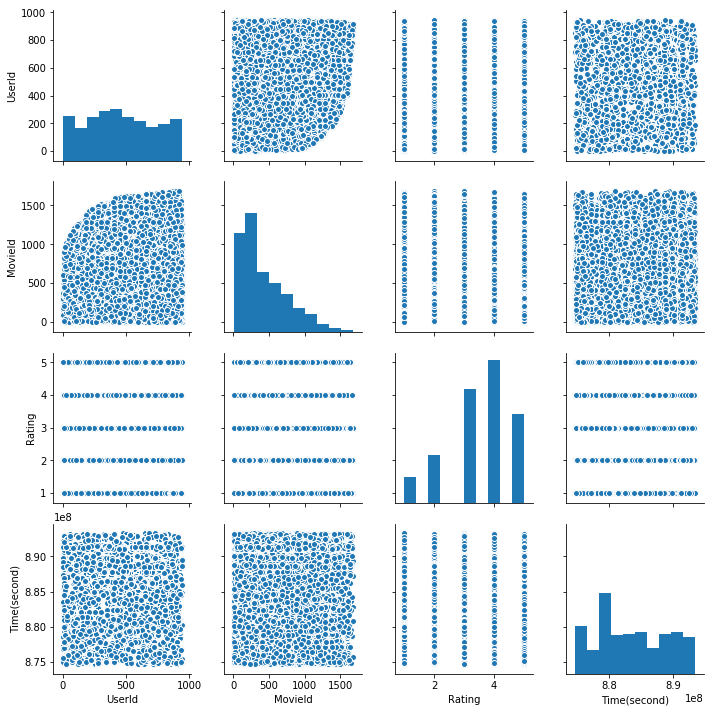

In [24]:
sns.pairplot(df)

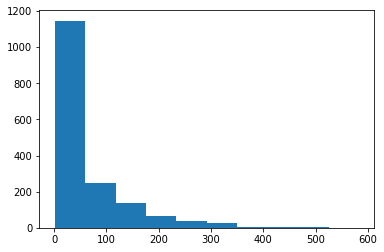

In [25]:
plt.hist(df.groupby(["MovieId"])["MovieId"].count())
plt.show()

## Create the reccomendation matrix

In [27]:
n_user = df["UserId"].nunique()
n_movies = df["MovieId"].nunique()
n_user

943

In [28]:
ratings = np.zeros((n_user,n_movies))

In [29]:
for row in df.itertuples():
    ratings[row[1]-1,row[2]-1] = row[3]

In [32]:
ratings.shape

(943, 1682)

In [36]:
sparcity = len(ratings.nonzero()[0])
sparcity /= (ratings.shape[0]*ratings.shape[1])
sparcity *= 100
sparcity

0

In [37]:
from sklearn.cross_validation import train_test_split

In [39]:
rating_train, rating_test = train_test_split(ratings)

## Creating the filter

In [40]:
import numpy as np
import sklearn

In [41]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(rating_train)

In [43]:
sim_matrix.shape

(707, 707)

In [46]:
users_prediction = sim_matrix.dot(rating_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
def get_mse(preds, actuals):
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds , actuals)

In [50]:
get_mse(users_prediction,rating_train)

7.84571914199

In [51]:
get_mse(users_prediction, rating_test)

8.885439365134374

### Filter with K-nearest neighbors

In [52]:
from sklearn.neighbors import NearestNeighbors

In [53]:
k = 10

In [54]:
neighbors = NearestNeighbors(k, "cosine")

In [55]:
neighbors.fit(rating_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2,
         radius='cosine')

In [56]:
top_k_distances, top_k_users = neighbors.kneighbors(rating_train)

In [59]:
user_predicts_k = np.zeros(rating_train.shape)
for i in range(rating_train.shape[0]):
    user_predicts_k[i,:] = top_k_distances[i].T.dot(rating_train[top_k_users][i]) /  np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [60]:
get_mse(user_predicts_k, rating_train)

8.231194775312646

In [61]:
get_mse(user_predicts_k, rating_test)

11.300608789181837